# NSRDB and SAM for Solar Power Calculation
---

**NREL**: National Renewable Energy Laboratory

**NSRDB**: National Solar Radiation Database  
Information can be found at https://nsrdb.nrel.gov  
API key Signup: https://developer.nrel.gov/signup/  
API instructions: https://developer.nrel.gov/docs/solar/nsrdb/psm3-download/

**SAM**: System Advisor Model  
Information can be found at https://sam.nrel.gov/  
SDK: https://sam.nrel.gov/sdk. The SDK needs to be downloaded.

NSRDB is a serially complete collection of meteorological and solar irradiance data sets for the United States and a growing list of international locations. NSRDB uses a physics-based modeling (PSM: Physical Solar Model) approach to provide solar radiation data for the entire United States in gridded segments (4x4 square kilometer) using geostationary satellites. Data can be accessed via an API.

The [PVWatts v7](https://nrel-pysam.readthedocs.io/en/master/modules/Pvwattsv7.html) model is used to estimate the power output.

In [1]:
from powersimdata.input.grid import Grid
from prereise.gather.solardata.nsrdb import sam
from prereise.gather.solardata.helpers import to_reise

from getpass import getpass
from matplotlib import pyplot

## 1. Solar plants in Network

In [2]:
grid = Grid("Texas")
solar_plant = grid.plant.groupby('type').get_group('solar')

Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv


In [3]:
solar_plant.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,type,interconnect,GenFuelCost,GenIOB,GenIOC,GenIOD,zone_id,zone_name,lat,lon
plant_id,,,,,,,,,,,,,,,,,,,,,
12878,3001011,9.99,0.0,0.0,0.0,1.00,12.00,1,10.0,0.0,...,solar,Texas,0.0,0.0,0.0,0,301,Far West,29.6000,-104.3000
12896,3001062,0.00,0.0,0.0,0.0,1.01,1.80,0,1.5,0.0,...,solar,Texas,0.0,0.0,0.0,0,301,Far West,32.2732,-101.4220
12897,3001063,0.00,0.0,0.0,0.0,1.01,276.00,0,230.0,0.0,...,solar,Texas,0.0,0.0,0.0,0,301,Far West,32.2732,-101.4220
12984,3003120,29.70,0.0,0.0,0.0,1.00,47.52,1,39.6,0.0,...,solar,Texas,0.0,0.0,0.0,0,303,West,29.3289,-100.3840
13161,3006085,1.05,0.0,0.0,0.0,1.04,1.68,1,1.4,0.0,...,solar,Texas,0.0,0.0,0.0,0,306,South Central,30.5570,-97.6903


In [4]:
print("There are %d solar plants in the Texas interconnection." % len(solar_plant))

There are 36 solar plants in the Texas interconnection.


## 2. Downloading Data
Visit https://developer.nrel.gov/signup/ to get your API key. Set the path to the SAM Simulation Core (SSC) library in `ssc_lib`.

In [5]:
email = input(prompt='email=')
key = getpass(prompt='api_key=')

email=daniel@breakthroughenergy.org
api_key=········


In [6]:
data = sam.retrieve_data_blended(email, key, grid=grid)

100%|██████████████████████████████████████████| 17/17 [00:51<00:00,  3.14s/it]


In [7]:
data.head(n=20)

,12878,12896,12897,12984,13161,13162,13163,13164,13165,13166,...,13997,13998,13999,14000,14001,14002,14003,14004,14005,14006
2016-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 05:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 07:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01 09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
data.describe()

,12878,12896,12897,12984,13161,13162,13163,13164,13165,13166,...,13997,13998,13999,14000,14001,14002,14003,14004,14005,14006
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,...,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,0.319473,0.305552,0.305552,0.280769,0.275564,0.275564,0.275564,0.275564,0.275564,0.275564,...,0.310299,0.302906,0.302906,0.313706,0.313175,0.315599,0.302906,0.317617,0.313706,0.297031
std,0.392525,0.384133,0.384133,0.365295,0.363075,0.363075,0.363075,0.363075,0.363075,0.363075,...,0.389951,0.385331,0.385331,0.391299,0.390747,0.393994,0.385331,0.395716,0.391299,0.379438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.770420,0.726192,0.726192,0.660864,0.628115,0.628115,0.628115,0.628115,0.628115,0.628115,...,0.748457,0.728051,0.728051,0.745061,0.763090,0.766505,0.728051,0.763064,0.745061,0.705764
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [9]:
plant_id = 12897
print("Capacity of the plant: %.1f MW" % solar_plant.loc[plant_id].Pmax)

Capacity of the plant: 230.0 MW


In [10]:
data_oneplant = data[plant_id] * solar_plant.loc[plant_id, "Pmax"]

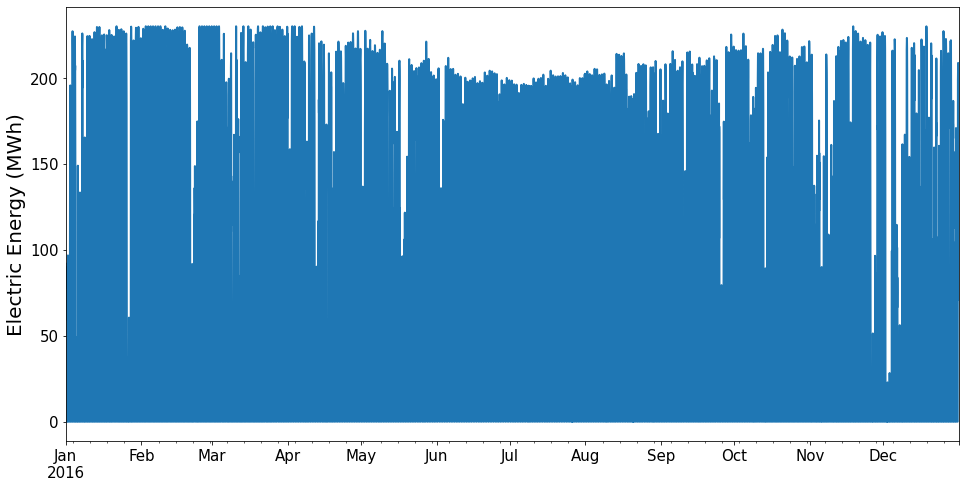

In [11]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant.plot(ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

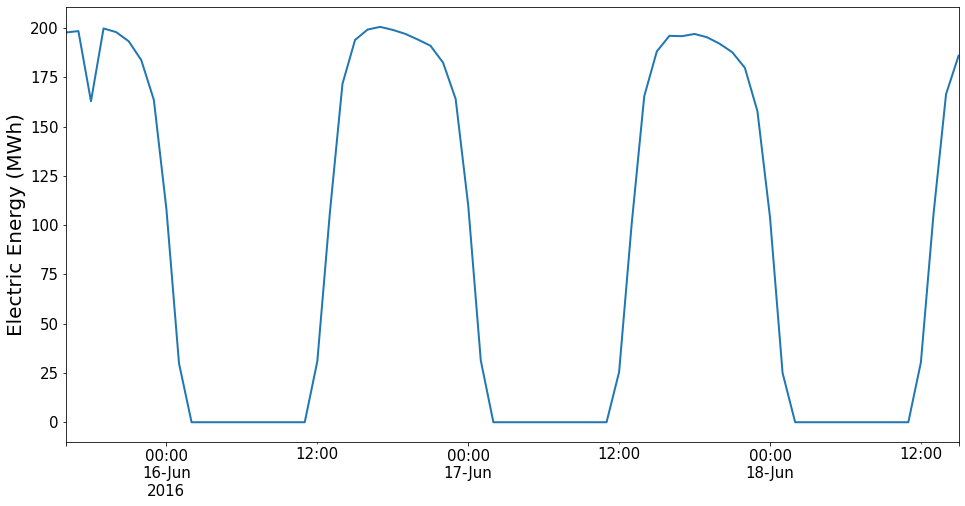

In [12]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant[4000:4072].plot(ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

In [13]:
print("Capacity Factor: %.3f" % (data_oneplant.sum() / (366 * 24 * solar_plant.loc[plant_id].Pmax)))

Capacity Factor: 0.306
